# **Laboratorio 3**
Estudiante: Alejandra Arciniegas Marin, C.C 1000 662 159

In [27]:
#@title Importar librerías

import numpy as np
import pandas as pd
from numpy import random as rd
import matplotlib.pyplot as plt
import sympy as sp
from sklearn.linear_model import LinearRegression



1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|







In [28]:
#@title 1. Dataframe
m = 10 #Número de datos a utilizar

#Creación del dataframe con las 3 columnas especificadas
df = pd.DataFrame(columns=['Entrenamiento', 'Y', 'X_1'])

#Creación de los arreglos con los números del 1 al 10 que usaremos en cada columna
Entrenamiento = np.arange(0,m+1,1)
Y = np.arange(0,m+1,1)
X_1 = np.arange(0,m+1,1)

#Asignación de los valores a cada columna
df['Entrenamiento'] = Entrenamiento
df['Y'] = Y
df['X_1'] = X_1
df

,Entrenamiento,Y,X_1
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4
5,5,5,5
6,6,6,6
7,7,7,7
8,8,8,8
9,9,9,9


In [29]:
#@title 2.Crear una función para calcular la función de coste

def Coste(theta_0,theta_1,x,y):
  m = len(x) #Número de datos que están siendo utilizados
  return (1/(2*m)) * (np.sum((theta_0 + theta_1*x -y)**2))


In [30]:
#Definir la ecuación de la recta para hacer los gráficos necesarios

def Modelo(a,b,x):
  return a*x + b

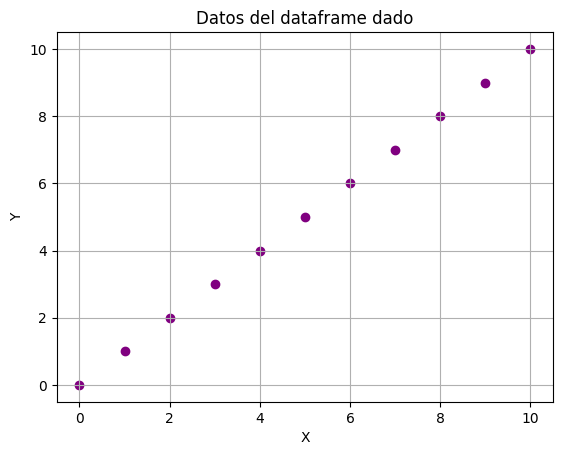

In [31]:
#@title Graficar los datos iniciales del dataframe para visualizarlos

plt.scatter(df['X_1'],df['Y'], color = 'purple')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Datos del dataframe dado')
plt.grid()
plt.show()

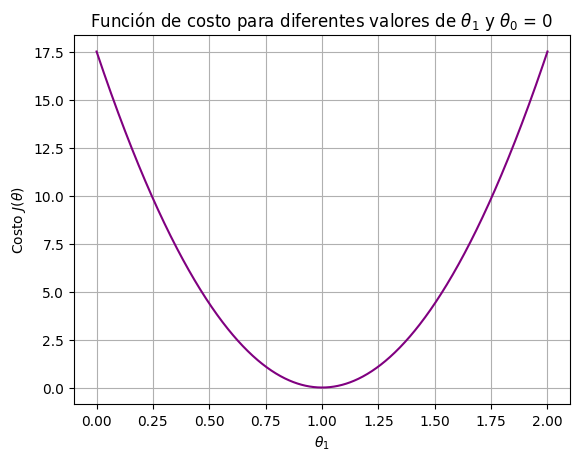

In [32]:
#@title 3. Asumiendo que  θ0=0 , represente gráficamente la función de costo para diferentes valores de  θ1 . Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.

#Definir los valores de theta0 y theta1 que se van a utilizar para calcular la función de costo
theta_1 = np.linspace(0,2,1000)
theta_0 = 0

J = [] #Lista vacía para guardar cada uno de los valores calculados para la función de costo

#Para cada valor de theta1, calcular la función de costo haciendo uso de la función definida en el punto anterior
for i in theta_1:
  j = Coste(theta_0,i,df['X_1'],df['Y'])
  J.append(j)

#Gráfico

plt.plot(theta_1,J, color = 'purple')
plt.xlabel('$\\theta_1$')
plt.ylabel('Costo $J(\\theta)$')
plt.title(f'Función de costo para diferentes valores de $\\theta_{1}$ y $\\theta_{0}$ = 0')
plt.grid()
plt.show()

In [33]:
#Encontrar la posición donde la función de coste es mínima y su valor

arg_min = np.argmin(J)
min = J[arg_min]
print(f'El valor minimo de la funcion es {min} y se da en theta_1 = {theta_1[arg_min]}')

El valor minimo de la funcion es 1.7535052570087583e-05 y se da en theta_1 = 0.998998998998999


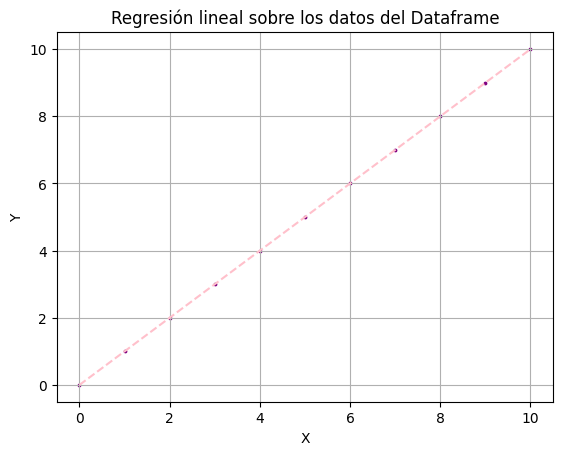

In [34]:
#Utilizar el theta_1 que dio lugar al mínimo de la función como la pendiente de la recta de ajuste
Y_ajuste = Modelo(theta_1[arg_min],0,df['X_1'])


#Gráfico
plt.plot(df['X_1'],Y_ajuste, '--', color = 'pink')
plt.scatter(df['X_1'],df['Y'], s = 3, color = 'purple')

plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión lineal sobre los datos del Dataframe')

plt.show()

In [35]:
#@title 4. Encontrar la función de coste para diferentes valores de  θ0 ,  θ1 . Para ello puede emplear los metodos surface y contour dentro de la libreria de matplotlib. Construya primero, con los valores de  θ0 ,  θ1  definidos un np.meshgrid y evalue para cada punto  θ0 ,  θ1  la función de coste.

#Matriz con los diferentes valores de theta0 y theta1 que vamos a variar del 0 al 2
t0,t1 = np.meshgrid(np.linspace(0,2,10),np.linspace(0,2,10))

#Lista vacía para agregar las funciones de coste de cada una de las parejas theta0 y theta1
J = []

#Cálculo de la función de coste para cada pareja theta0 y theta1, el primer ciclo itera sobre theta0 y el segundo sobre theta1; pues theta0 son las filas y theta 1 las columnas de la matriz
for i in range(len(t0)):
  for j in range(len(t0[0])):
    ji = Coste(t0[i,j],t1[i,j],df['X_1'],df['Y'])
    J.append(ji)



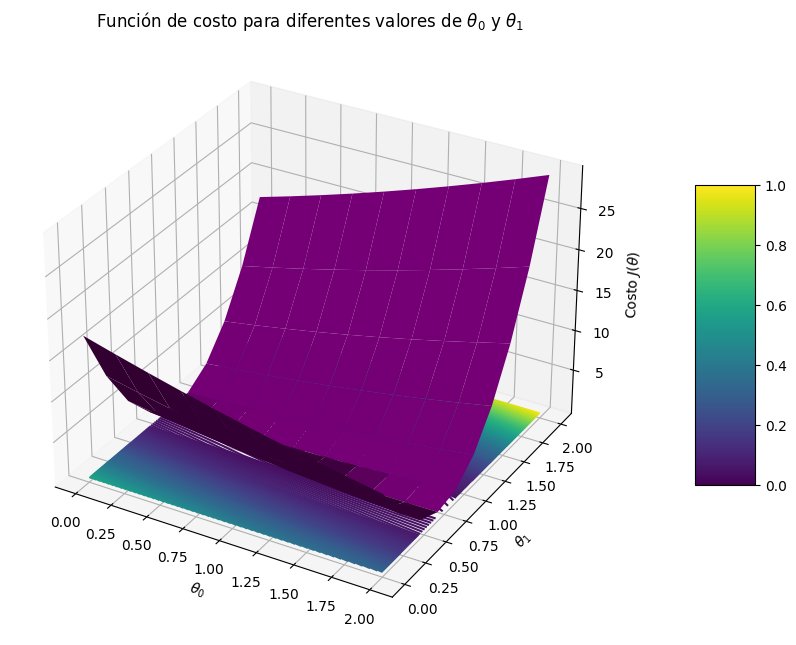

In [36]:
#Gráfico de la función de Coste en 3D

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')

surface = ax.plot_surface(t0, t1, np.array(J).reshape(t0.shape), color = 'purple') # Reshape J to match t0 and t1 dimensions
contour = ax.contour(t0, t1, np.array(J).reshape(t0.shape), 200, linestyles="solid", offset=np.min(J) ) # Reshape J and set offset for contour

ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("Costo $J(\\theta)$")

ax.set_title(f'Función de costo para diferentes valores de $\\theta_{0}$ y $\\theta_{1}$')

# Añadir la barra de color
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)


# Ajustar los márgenes para asegurar que las etiquetas sean visibles
plt.subplots_adjust(left=0.3, right=2, top=0.9, bottom=0.3)

plt.show()

# 5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.


En el caso 2D, donde varían tanto el intercepto como la pendiente de recta, el modelo está dado por:

$h(X) =\theta_0 + \theta_1 X$


Reemplando el modelo anterior en la función de coste, tenemos que:



\begin{equation}
J(\theta_0, \theta_1)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X^{(i)})- y^{(i)})^2
\end{equation}


En el caso 1D, $\theta_0 = 0$, de modo que el modelo es:

$h(X) =  \theta_1 X$

Y así, la función de coste sería:
\begin{equation}
J(\theta_1)=\frac{1}{2m} \sum_{i=0}^m ( \theta_1 X^{(i)}- y^{(i)})^2
\end{equation}


In [37]:
#@title 6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de 1E-4, pruebe su algoritmo para  f(x)=(x−4)^2  y al menos 3 valores de  α

def gradiente_descendente_1D(f_num, df_num, wi, alpha, epsilon):
  wi1 = wi - alpha * df_num(wi)  #cálculo inicial a partir de los valores aleatorios iniciales que se entregan

  while abs(f_num(wi1) - f_num(wi)) > epsilon: #ciclo y condición de parada
    wi = wi1
    wi1 = wi - alpha * df_num(wi)

  return wi1



In [38]:
#Calcular la derivada de la función con Sympy
x = sp.Symbol('x')
f = (x-4)**2
df = sp.diff(f,x)

#Pasar la derivada y la función simbólicas a funciones de tipo lambda, de manera que puedan ser usables numericamente
df_num = sp.lambdify(x,df)
f_num = sp.lambdify(x,f)


In [39]:
#Definit el wi inicial que se va a utilizar de forma aleatoria, los alfas que se van a probar y epsilon
wi = rd.randint(0,11)
alpha = np.array([0.1,0.6,0.9])
epsilon = 1E-4

#Encontrar el mínimo de la función con cada uno de los alfas de la lista alpha
for i in alpha:
  grad = gradiente_descendente_1D(f_num, df_num,wi,i,epsilon)
  min = f_num(grad)
  print(f'El valor minimo de la funcion usando alfa = {i} es {min} y se da en x = {grad}')


El valor minimo de la funcion usando alfa = 0.1 es 0.00013292279957851066 y se da en x = 4.011529215046069
El valor minimo de la funcion usando alfa = 0.6 es 2.559999999999436e-06 y se da en x = 4.0016
El valor minimo de la funcion usando alfa = 0.9 es 0.00013292279957849017 y se da en x = 4.011529215046068


In [40]:
#@title 7. Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente

#Definir la función y las derivadas parciales de la función respecto a las variables x y y de forma simbólica
x,y = sp.symbols('x y')

f = sp.sin((1/2)*x**2-(1/4)*y**2+3)*sp.cos(2*x + 1 - sp.exp(y))
dfx = sp.diff(f,x)
dfy = sp.diff(f,y)

#Pasar las funciones simbólicas a funciones numéricas para pderlas utilizar
dfx_num = sp.lambdify((x,y),dfx)
dfy_num = sp.lambdify((x,y),dfy)
f_num = sp.lambdify((x,y),f)

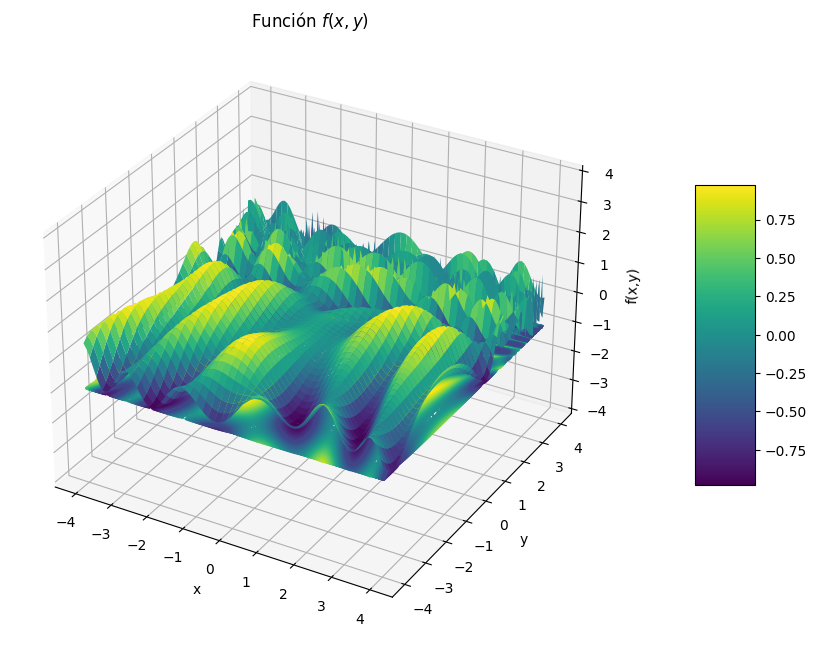

In [41]:
#Generar la matriz con los valores de X y Y que se van a evaluar en la función
xs,ys = np.meshgrid(np.linspace(-4,4,100),np.linspace(-4,4,100))
#Evaluar la función
zs = f_num(xs,ys)

#Gráfica
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')

surface = ax.plot_surface(xs, ys, zs, cmap='viridis')
contour = ax.contour(xs, ys, zs, 200, linestyles="solid", offset=np.min(zs) )

ax.set_zlim([-4,4])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

ax.set_title(f'Función $f(x,y)$')

# Añadir la barra de color
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)

# Ajustar los márgenes para asegurar que las etiquetas sean visibles
plt.subplots_adjust(left=0.3, right=2, top=0.9, bottom=0.3)

# Mostrar el gráfico
plt.show()

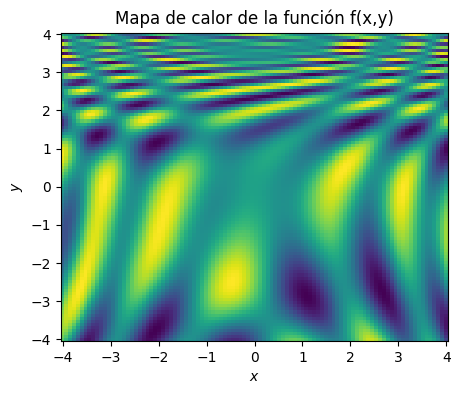

In [42]:
#Gráfica del mapa de calor de la función

plt.figure(figsize=(5,4))

plt.title('Mapa de calor de la función f(x,y)')
plt.pcolor(xs, ys, zs, cmap = "viridis")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [43]:
#Crear función para el gradiente descendente en 2D; se hace lo mismo que para el gradiente descente en 1D pero para cada una de las variables, en este caso x y y.
def gradiente_descendente_2D(f_num, dfx_num, dfy_num, xi, yi, alpha, epsilon):
  xi1 =  xi - alpha * dfx_num(xi,yi)
  yi1 =  yi - alpha * dfy_num(xi,yi)

  while abs(f_num(xi1, yi1) - f_num(xi, yi)) >= epsilon:
    xi = xi1
    yi = yi1
    xi1 =  xi - alpha * dfx_num(xi,yi)
    yi1 =  yi - alpha * dfy_num(xi,yi)

  return xi1, yi1

In [44]:
#Generar aleatoriamente los valores iniciales de x y y
xi = rd.randint(-2.5,2.5)
yi = rd.randint(0,1.5)
rd.seed(0)

#Valores de alfa y epsilon a utilizar
alpha = 0.1
epsilon = 1E-4

#Encontrar los mínimos de x y y del gradiente descendente
xmin,ymin = gradiente_descendente_2D(f_num,dfx_num,dfy_num, xi,yi,alpha,epsilon)
min = f_num(xmin,ymin)
print(f'El valor minimo de la funcion usando alfa = {alpha} es {min} y se da en x = {xmin} y y = {ymin}')


El valor minimo de la funcion usando alfa = 0.1 es -0.9999698449823708 y se da en x = -2.030705775305607 y y = 1.1694352272581645


In [45]:
#@title 8. Empleando los siguientes datos y las herramientas desarrolladas en los apartados anteriores, construya un algoritmo que permita determinar una regresión lineal.

#Generar un conjunto de x para reemplazar en la ecuación dada
Xs = np.linspace(0, 1, 100)

#Utilizar la ecuación dada para generar los datos aleatorios
Ys = 0.2 + 0.2*Xs + 0.02*np.random.random(100)


'''
Definir la regresión lineal en 2D. Aquí se utiliza el modelo lineal en la función de coste, se calcula de forma analítica las derivadas parciales
de la función de coste y se usan estas 3 funciones en el algortimo del gradiente descendente para encontrar el mínimo de la función de coste y los
parámetros b y m que generan dicho mínimo.
'''

def Regresion_Lineal_2D(theta0i,theta1i, alpha, epsilon, X, Y):
  m = len(X)
  modelo = lambda theta0, theta1: theta0 + theta1*X

  J = lambda theta0, theta1: (1/2*m)*np.sum((modelo(theta0,theta1) - Y)**2)
  dJ_theta0 = lambda theta0, theta1: (1/m)*np.sum((modelo(theta0,theta1) - Y)) #Derivada parcial de J respecto a theta_0
  dJ_theta1 = lambda theta0, theta1: (1/m)*np.sum((modelo(theta0,theta1) - Y)*X) #Derivada parcial de J respecto a theta_1
  b, m = gradiente_descendente_2D(J, dJ_theta0, dJ_theta1, theta0i, theta1i, alpha, epsilon)

  return b,m


b = 0.211957049755084 y m = 0.19499765220677165


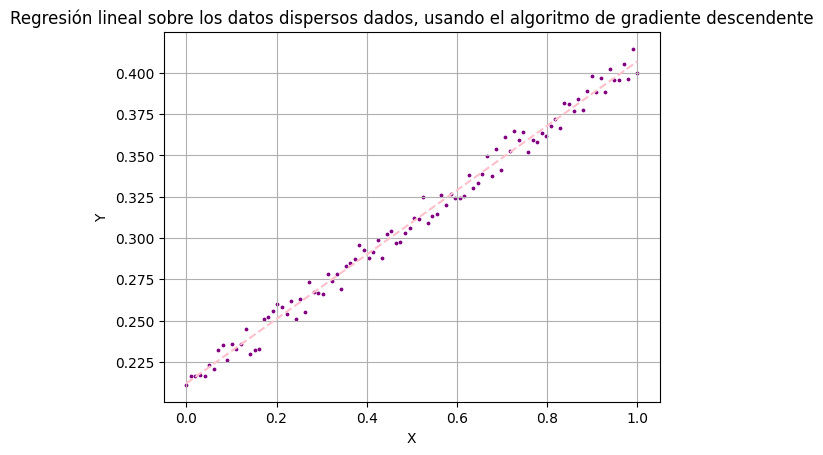

In [46]:
#Generar los valores iniciales aleatorio de theta_0 y theta_1
theta_0i = rd.randint(0,4)
theta_1i = rd.randint(0,4)
rd.seed(0)

#Definir el alfa y epsilon a utilizar, la elección en este caso fue arbitraria
alpha = 0.01
epsilon = 1E-200

#Encontrar los parámetros b y m
b,m = Regresion_Lineal_2D(theta_0i,theta_1i,alpha,epsilon,Xs,Ys)
print(f'b = {b} y m = {m}')

#Gráfica

plt.plot(Xs,m*Xs+b, '--', color = 'pink')
plt.scatter(Xs,Ys, s = 3, color = 'purple')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión lineal sobre los datos dispersos dados, usando el algoritmo de gradiente descendente')
plt.show()

In [47]:
#@title 9. Compare su resultado empleando la libreria linearRegresion() de sklearn.
reg = LinearRegression()
reg.fit(Xs.reshape(-1,1),Ys)
b2 = reg.intercept_
m2 = reg.coef_[0]
print(f'b = {b2} y m = {m2}') #Como se puede ver, coinciden casi completamente ambos parámetros

b = 0.21195706365194478 y m = 0.19499762627661113


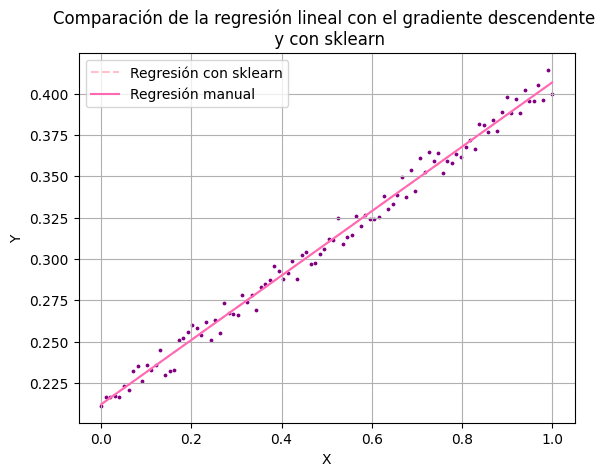

In [48]:
#Gráfica

plt.plot(Xs,m2*Xs+b2, '--', color = 'pink', label = 'Regresión con sklearn')
plt.plot(Xs, m*Xs+b, color = 'hotpink', label = 'Regresión manual')
plt.scatter(Xs,Ys, s = 3, color = 'purple')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparación de la regresión lineal con el gradiente descendente \n y con sklearn')
plt.legend()
plt.show()